# VINAY YADAV

Data Science & Business Analytics (The Sparks Foundation)

#GRIPFEB21

Task #1- Prediction using Supervised ML (Linear Regression with Python Scikit Learn)

Task - What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# DATASET

In [7]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dt=pd.read_csv(url)
print("DATASET LOADED")
dt

DATASET LOADED


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# After Sucessfully data loaded will check for missing value 
dt.isnull().sum()   #Here we can observed, there is not any missing value so we can proceed further 

Hours     0
Scores    0
dtype: int64

In [11]:
dt.info()  #Summary of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
dt.describe()  #This describe() function is important to get the insights of descriptive statistics 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# DATA  VISUALIZATION

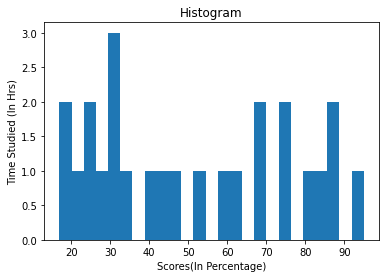

In [47]:
da=dt.set_index('Hours')  #We have to set index to hours to get accurate Histogram

#Plotting Histogram To check the Distribution of data 

plt.title("Histogram")
plt.xlabel("Scores(In Percentage)")
plt.ylabel("Time Studied (In Hrs)")
plt.hist(da,bins=25) # Choosen bin=25 , because thats the total counts of data 
plt.show()

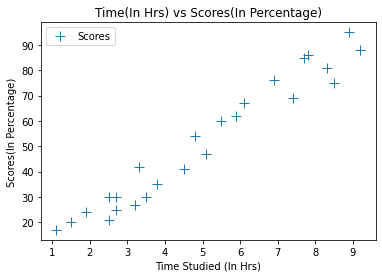

In [51]:
#Data Plotting

dt.plot(x="Hours",y="Scores",style="o",marker="+",markersize="10")
plt.title("Time(In Hrs) vs Scores(In Percentage)")
plt.xlabel("Time Studied (In Hrs)")
plt.ylabel("Scores(In Percentage)")
plt.show()

# Observe, Plotting is Postive Correlation that means, hours and scores is directly proportional to each others

In [52]:
X = dt.iloc[:, :-1].values  
y = dt.iloc[:, 1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [53]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Preprocessing

In [57]:
#We are splitting our data traditionally, 80:20 Rule

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [58]:
#checking the .shape of splitted dataset

print("X train.shape =", X_train.shape)
print("X test.shape  =", X_test.shape)
print("y train.shape =", y_train.shape)
print("y test.shape  =", y_test.shape)

X train.shape = (20, 1)
X test.shape  = (5, 1)
y train.shape = (20,)
y test.shape  = (5,)


In [59]:
#Fitting The DATA 

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

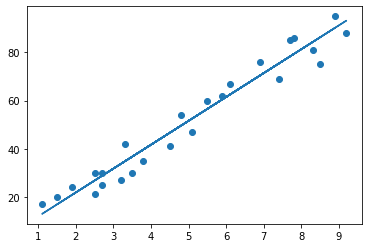

In [57]:
#Plotting Regression Line

line = regressor.coef_*X+regressor.intercept_


#plotting
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [60]:
y_pred=regressor.predict(X_test)
print(X_test) #X Test

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [61]:
print(y_test) #Y Test

[20 27 69 30 62]


In [62]:
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred}) #Actual VS Predicted of Test DATASET
df

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [65]:
from sklearn import metrics  
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred))

print('R^2 Score: ',metrics.r2_score(y_test,y_pred))


Mean Absolute Error:  4.18385989900298
R^2 Score:  0.9454906892105355


# Our Accuracy is 94.5491% , EXCELLENT

# Task:- What will be predicted score if a student studies for 9.25 hrs/ day?

In [83]:
hours = np.array(9.25).reshape(-1, 1)
own_pred = regressor.predict(hours)
print("If Student Studies {}".format(hours),"Hours per day than Probably he can score {}".format(own_pred[0]),"Marks")

If Student Studies [[9.25]] Hours per day than Probably he can score 93.69173248737538 Marks


# ANS: If Student Studies 9.25 Hours per day than Probably he can score 94 (Approx) Marks

# Thank You